# Troubleshooting practice

## Goal:
Plot the latest surface geopotential heights as filled contours

Data source: National Centers for Environmental Prediction (NCEP) Real-Time Mesoscle Analysis (RTMA); Unidata THREDDS Data Server (TDS)

## Tasks:
- Run all cells
- Address all errors
- Notate changes made in the cell at the bottom of this notebook

In [1]:
# import required packages
from siphon.catalog import TDSCatalog
import matplotlib.pyplot as plt

In [2]:
# Read the full collection dataset (reference and forecast times) from the THREDDS Data Server
url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/catalog.html'
xmlurl = url.replace(".html", ".xml")
rtma_cat = TDSCatalog(xmlurl)
rtma_data = rtma_cat.datasets['Full Collection (Reference / Forecast Time) Dataset'].remote_access(use_xarray=True)
rtma_data

<xarray.Dataset>
Dimensions:                                                              (
                                                                          validtime2Offset: 1,
                                                                          : 2,
                                                                          reftime: 736,
                                                                          reftime1: 737,
                                                                          timeOffset: 1,
                                                                          ...
                                                                          x: 2145,
                                                                          height_above_ground: 1,
                                                                          height_above_ground1: 1,
                                                                          reftime2: 736,
                                                                          validtime1Offset: 1,
                                                                          altitude_above_msl: 1)
Coordinates: (12/14)
  * x                                                                    (x) float32 ...
  * y                                                                    (y) float32 ...
  * reftime                                                              (reftime) datetime64[ns] ...
  * reftime1                                                             (reftime1) datetime64[ns] ...
  * reftime2                                                             (reftime2) datetime64[ns] ...
  * timeOffset                                                           (timeOffset) float64 ...
    ...                                                                   ...
    validtime1                                                           (reftime2, validtime1Offset) datetime64[ns] ...
  * validtime2Offset                                                     (validtime2Offset) float64 ...
    validtime2                                                           (reftime, validtime2Offset) datetime64[ns] ...
  * height_above_ground                                                  (height_above_ground) float32 ...
  * height_above_ground1                                                 (height_above_ground1) float32 ...
  * altitude_above_msl                                                   (altitude_above_msl) float32 ...
Dimensions without coordinates: 
Data variables: (12/23)
    LambertConformal_Projection                                          int32 ...
    validtime2Offset_bounds                                              (validtime2Offset, ) datetime64[ns] ...
    validtime2_bounds                                                    (reftime, validtime2Offset, ) datetime64[ns] ...
    Total_cloud_cover_Analysis_entire_atmosphere_single_layer            (reftime1, timeOffset, y, x) float32 ...
    Pressure_error_surface                                               (reftime1, timeOffset, y, x) float32 ...
    Wind_direction_from_which_blowing_error_height_above_ground          (reftime1, timeOffset, height_above_ground, y, x) float32 ...
    ...                                                                   ...
    Wind_speed_Analysis_height_above_ground                              (reftime2, validtime1Offset, height_above_ground, y, x) float32 ...
    u-component_of_wind_Analysis_height_above_ground                     (reftime1, timeOffset, height_above_ground, y, x) float32 ...
    v-component_of_wind_Analysis_height_above_ground                     (reftime1, timeOffset, height_above_ground, y, x) float32 ...
    Geopotential_height_Analysis_surface                                 (reftime1, timeOffset, y, x) float32 ...
    Dewpoint_temperature_Analysis_height_above_ground                    (reftime2, validtime1Offset, height_above_ground1, y, x) float32 .

In [3]:
# Get most recent surface geopotential height
hgt = rtma_data['Geopotential_height_Analysis_surface'].isel(reftime1=-1)
hgt

<xarray.DataArray 'Geopotential_height_Analysis_surface' (timeOffset: 1,
                                                          y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x           (x) float32 -2.763e+03 -2.761e+03 ... 2.679e+03 2.682e+03
  * y           (y) float32 -263.8 -261.2 -258.7 ... 3.228e+03 3.231e+03
    reftime1    datetime64[ns] 2023-09-08T16:00:00
  * timeOffset  (timeOffset) float64 0.0
    time        (timeOffset) datetime64[ns] ...
Attributes: (12/13)
    long_name:                       Geopotential height Analysis @ Ground or...
    units:                           gpm
    abbreviation:                    HGT
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_7-4--1-5_L1
    Grib2_Parameter:                 [0 3 5]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Geopotential height
    Grib2_Level_Type:                1
    Grib2_Level_Desc:                Ground or water surface
    Grib2_Generating_Process_Type:   Analysis
    Grib2_Statistical_Process_Type:  UnknownStatType--1

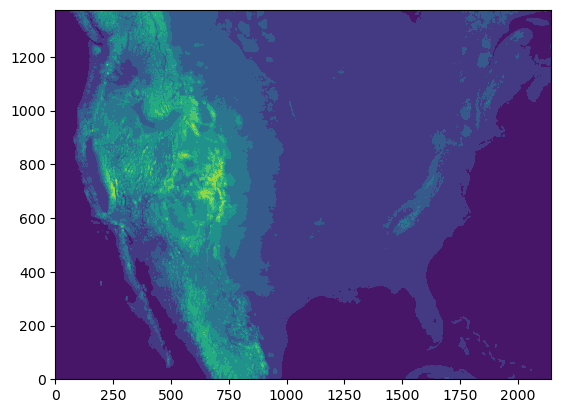

In [4]:
# Plot surface geopotential heights as filled contours
fig, ax = plt.subplots()
ax.contourf(hgt.squeeze())

### Write the summary of changes you made below this cell 

1. Incorrect dataset name

`rtma_data = rtma_cat.datasets['Full Collection (Reference / Forecast Time) Dataset'].remote_access(use_xarray=True)`

2. Incorrect dimension name

`hgt = rtma_data['Geopotential_height_Analysis_surface'].isel(reftime2=-1)`

3. Too many dimensions

`ax.contourf(hgt.isel(timeOffset=0))`

or

`ax.contourf(hgt.squeeze())`